In [118]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using Distributions, Plots, KernelDensity

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [119]:
# simulate time window up to M
M = 50;

## Local Sensitivity Analysis on priors

First, perform a local sensitivity analysis on the priors of all parameters to see which are the most influential to the model output.

In [120]:
# compute 100 samples
n = 200

# fixed parameter values
a = mean([0.94,2.81]) # suggested by Klausmeier paper
m = 0.45 # suggested by Klausmeier paper
n0 = 1.0 # no source
w0 = 1.0 # no source
noise = 0.0

# time point at which to evaluate sample density
t_pt_sample_dens = 5;

### sensitivity of a

In [121]:
# sensitivity of a
prior_a = Uniform(0.94,2.81)
samples_a = rand(prior_a,n)

# store for plotting
n_traj_sampled = []
w_traj_sampled = []

# for each sample solve klausmeier model
for a in samples_a
    hprm = Src.Hyperprm(w0,n0,a,m,M,noise)
    sol = Src.sol_klausmeier(hprm)
    sol = Src.randomize_data(sol, hprm.noise)
    push!(n_traj_sampled, sol[!,"n"])
    push!(w_traj_sampled, sol[!,"w"])
end

n_mean = mean(n_traj_sampled, dims=1)
w_mean = mean(w_traj_sampled, dims=1)
times = range(1, M);

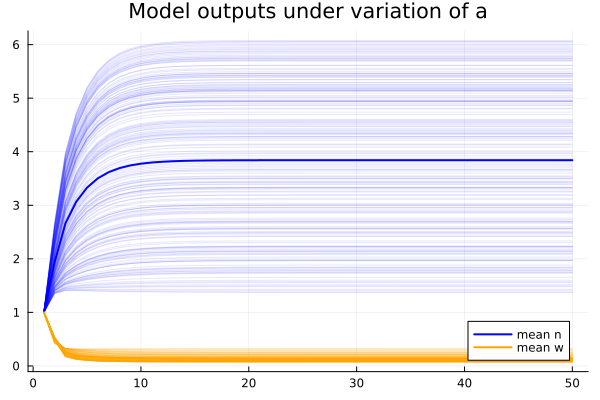

In [122]:
# plot probabilistic solution trajectories
plot(times, n_mean, label="mean n", lw=2, color=:blue, legend=:bottomright, title="Model outputs under variation of a")
for i in range(1, n)
    plot!(times,n_traj_sampled[i], color=:blue, alpha=0.1, label="")
    plot!(times,w_traj_sampled[i], color=:orange, alpha=0.1,label="")
end
plot_a_traj = plot!(times, w_mean, label="mean w", lw=2, color=:orange)

we conclude that the biomass trajectory is very sensitive to variation in a, whereas the water compartment is barely affected by it.

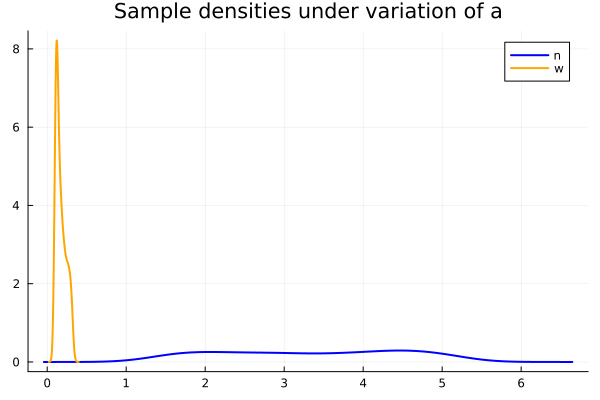

In [123]:
# plot density of samples at time point t
n_t_sam, w_t_sam = [s[t_pt_sample_dens] for s in n_traj_sampled], [s[t_pt_sample_dens] for s in w_traj_sampled]
n_t_dens, w_t_dens = kde(n_t_sam), kde(w_t_sam)
plot(n_t_dens.x, n_t_dens.density, color=:blue, lw=2, label="n", title="Sample densities under variation of a")
plot_a_dens = plot!(w_t_dens.x, w_t_dens.density, color=:orange, lw=2, label="w")

### sensitivity of m

In [124]:
# sensitivity of m
prior_m = Uniform(0.45-0.45*0.2,0.45+0.45*0.2)
samples_m = rand(prior_a,n)

# store for plotting
n_traj_sampled = []
w_traj_sampled = []

# for each sample solve klausmeier model
for m in samples_m
    hprm = Src.Hyperprm(w0,n0,a,m,M, noise)
    sol = Src.sol_klausmeier(hprm)
    sol = Src.randomize_data(sol, hprm.noise)
    push!(n_traj_sampled, sol[!,"n"])
    push!(w_traj_sampled, sol[!,"w"])
end

n_mean = mean(n_traj_sampled, dims=1)
w_mean = mean(w_traj_sampled, dims=1)
times = range(1, M);

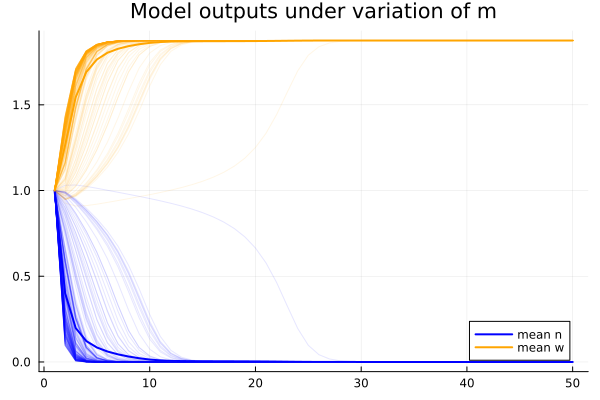

In [125]:
# plot probabilistic solution trajectories
plot(times, n_mean, label="mean n", lw=2, color=:blue, legend=:bottomright, title="Model outputs under variation of m")
for i in range(1, n)
    plot!(times,n_traj_sampled[i], color=:blue, alpha=0.1, label="")
    plot!(times,w_traj_sampled[i], color=:orange, alpha=0.1,label="")
end
plot_m_traj = plot!(times, w_mean, label="mean w", lw=2, color=:orange)

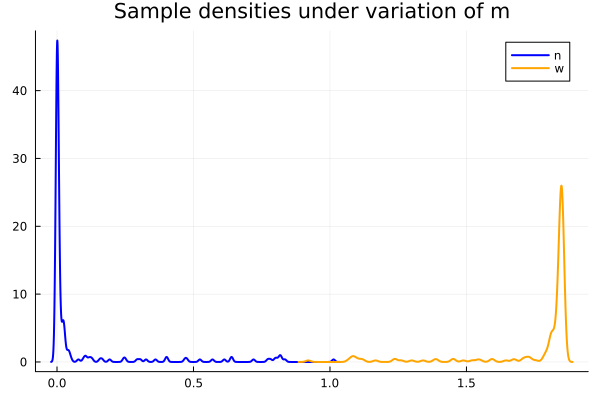

In [126]:
# plot density of samples at time point t
n_t_sam, w_t_sam = [s[t_pt_sample_dens] for s in n_traj_sampled], [s[t_pt_sample_dens] for s in w_traj_sampled]
n_t_dens, w_t_dens = kde(n_t_sam), kde(w_t_sam)
plot(n_t_dens.x, n_t_dens.density, color=:blue, lw=2, label="n", title="Sample densities under variation of m")
plot_m_dens = plot!(w_t_dens.x, w_t_dens.density, color=:orange, lw=2, label="w")

### sensitivity of n0

In [127]:
# sensitivity of n0
prior_n0 = Uniform(0.5,1.5)
samples_n0 = rand(prior_a,n)

# store for plotting
n_traj_sampled = []
w_traj_sampled = []

# for each sample solve klausmeier model
for n0 in samples_n0
    hprm = Src.Hyperprm(w0,n0,a,m,M,noise)
    sol = Src.sol_klausmeier(hprm)
    sol = Src.randomize_data(sol, hprm.noise)
    push!(n_traj_sampled, sol[!,"n"])
    push!(w_traj_sampled, sol[!,"w"])
end

n_mean = mean(n_traj_sampled, dims=1)
w_mean = mean(w_traj_sampled, dims=1)
times = range(1, M);

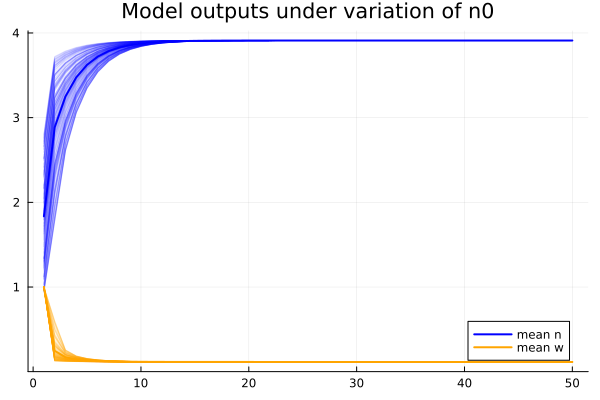

In [128]:
# plot probabilistic solution trajectories
plot(times, n_mean, label="mean n", lw=2, color=:blue, legend=:bottomright, title="Model outputs under variation of n0")
for i in range(1, n)
    plot!(times,n_traj_sampled[i], color=:blue, alpha=0.1, label="")
    plot!(times,w_traj_sampled[i], color=:orange, alpha=0.1,label="")
end
plot_n0_traj = plot!(times, w_mean, label="mean w", lw=2, color=:orange)

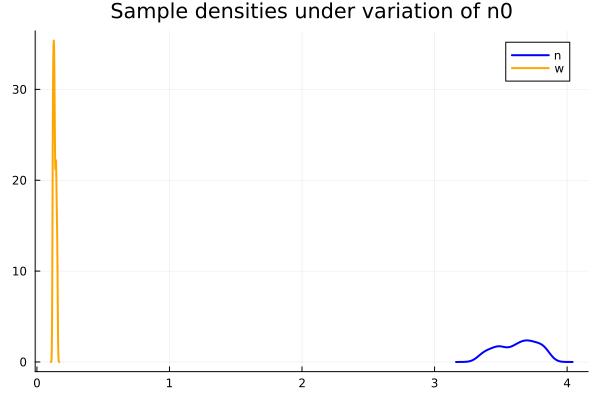

In [129]:
# plot density of samples at time point t
n_t_sam, w_t_sam = [s[t_pt_sample_dens] for s in n_traj_sampled], [s[t_pt_sample_dens] for s in w_traj_sampled]
n_t_dens, w_t_dens = kde(n_t_sam), kde(w_t_sam)
plot(n_t_dens.x, n_t_dens.density, color=:blue, lw=2, label="n", title="Sample densities under variation of n0")
plot_n0_dens = plot!(w_t_dens.x, w_t_dens.density, color=:orange, lw=2, label="w")

### sensitivity of w0

In [130]:
# sensitivity of n0
prior_w0 = Uniform(0.5,1.5)
samples_w0 = rand(prior_a,n)

# store for plotting
n_traj_sampled = []
w_traj_sampled = []

# for each sample solve klausmeier model
for w0 in samples_w0
    hprm = Src.Hyperprm(w0,n0,a,m,M,noise)
    sol = Src.sol_klausmeier(hprm)
    sol = Src.randomize_data(sol, hprm.noise)
    push!(n_traj_sampled, sol[!,"n"])
    push!(w_traj_sampled, sol[!,"w"])
end

n_mean = mean(n_traj_sampled, dims=1)
w_mean = mean(w_traj_sampled, dims=1)
times = range(1, M);

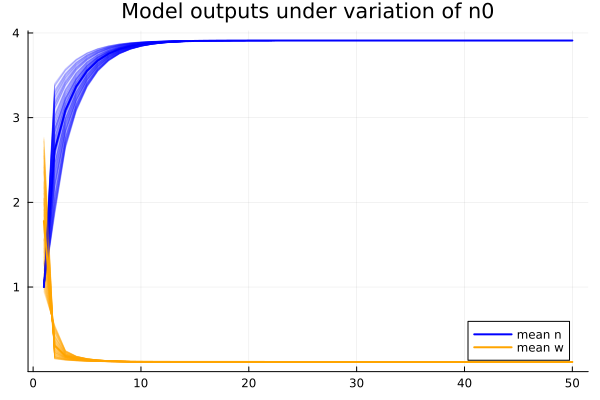

In [131]:
# plot probabilistic solution trajectories
plot(times, n_mean, label="mean n", lw=2, color=:blue, legend=:bottomright, title="Model outputs under variation of n0")
for i in range(1, n)
    plot!(times,n_traj_sampled[i], color=:blue, alpha=0.1, label="")
    plot!(times,w_traj_sampled[i], color=:orange, alpha=0.1,label="")
end
plot_w0_traj = plot!(times, w_mean, label="mean w", lw=2, color=:orange)

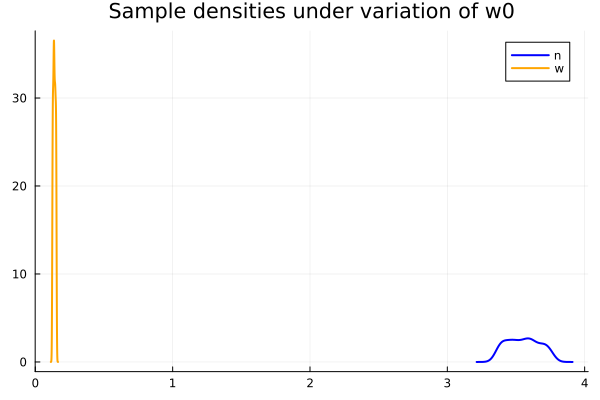

In [132]:
# plot density of samples at time point t
n_t_sam, w_t_sam = [s[t_pt_sample_dens] for s in n_traj_sampled], [s[t_pt_sample_dens] for s in w_traj_sampled]
n_t_dens, w_t_dens = kde(n_t_sam), kde(w_t_sam)
plot(n_t_dens.x, n_t_dens.density, color=:blue, lw=2, label="n", title="Sample densities under variation of w0")
plot_w0_dens = plot!(w_t_dens.x, w_t_dens.density, color=:orange, lw=2, label="w")

## Compare all

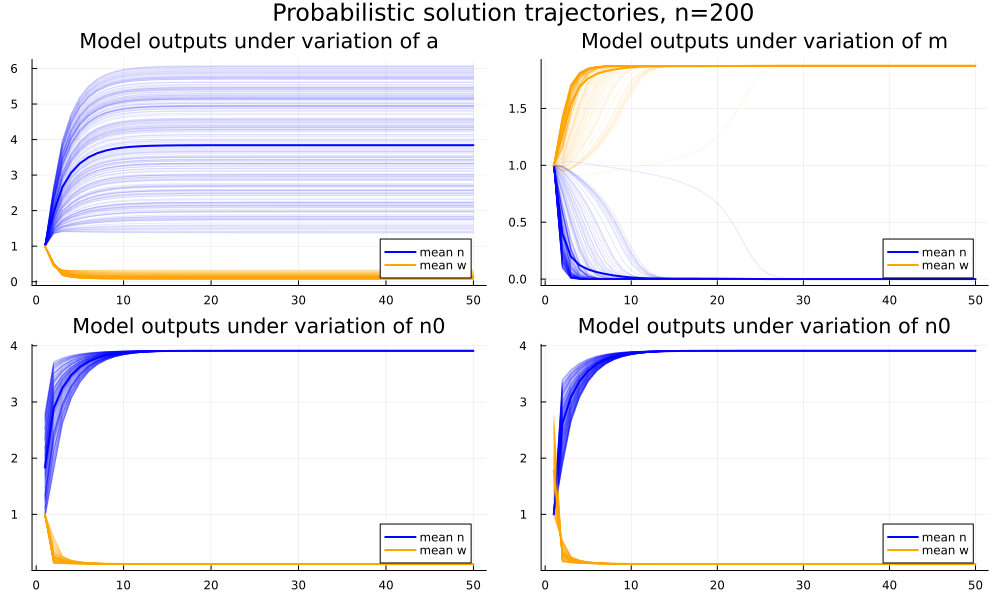

In [133]:
# plot probabilistic solution trajectories
plot(plot_a_traj, plot_m_traj, plot_n0_traj, plot_w0_traj, layout=(2,2), size=(1000,600), suptitle="Probabilistic solution trajectories, n=$n")

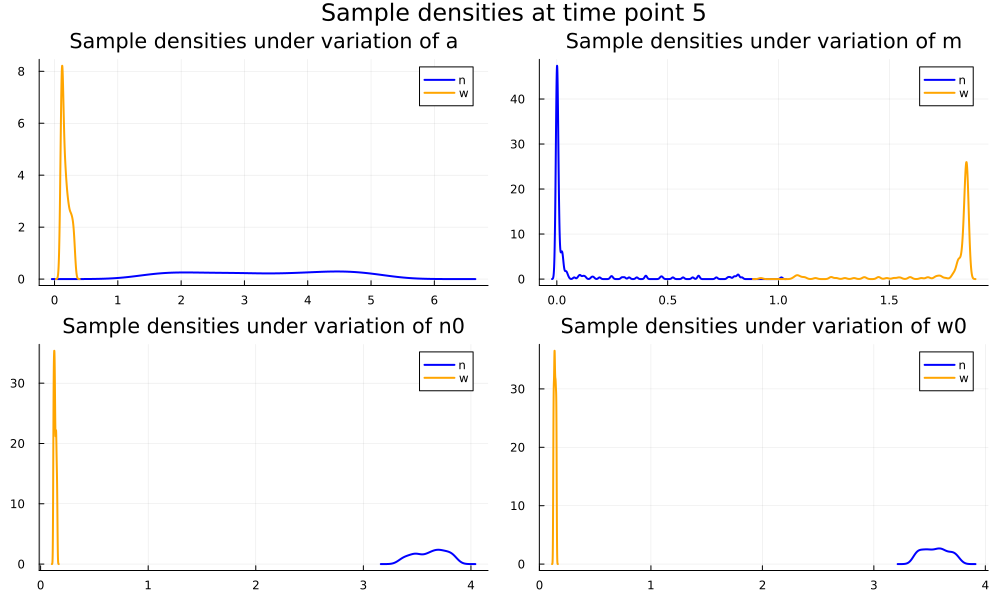

In [134]:
# plot sample densities
plot(plot_a_dens, plot_m_dens, plot_n0_dens, plot_w0_dens, layout=(2,2), size=(1000,600), suptitle="Sample densities at time point $t_pt_sample_dens")